In [1]:
import numpy as np
import control as ct
import NonLinVehicleSystem as NLVS
import sympy as sy
from matplotlib import pyplot as plt
import os
from IPython.display import display, Math, Latex

In [2]:
v1 = NLVS.NonLinVehicleSystem(50,12.5,.8)

Created Non Linear Vehicle Instance


In [9]:
TT= np.linspace(0,100,100)
t, y = v1.StateFeedbackPosInputResponse(TT,Input = [.8,.6,1])

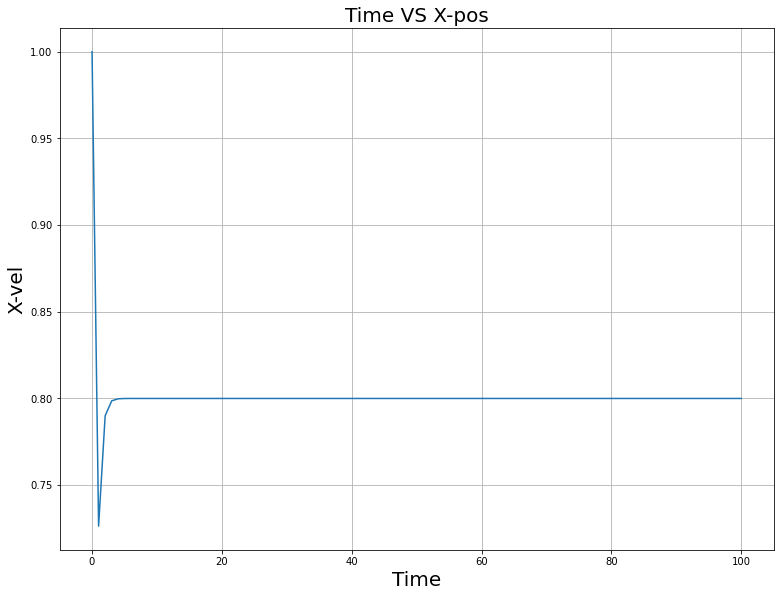

In [13]:
# Time VS X-pos
plt.figure(7,figsize=[12.8,9.6])
plt.title('Time VS X-pos', fontsize=20)
plt.plot(t,y[0])
plt.xlabel('Time',fontsize=20)
plt.ylabel('X-vel', fontsize=20)
plt.grid(True)

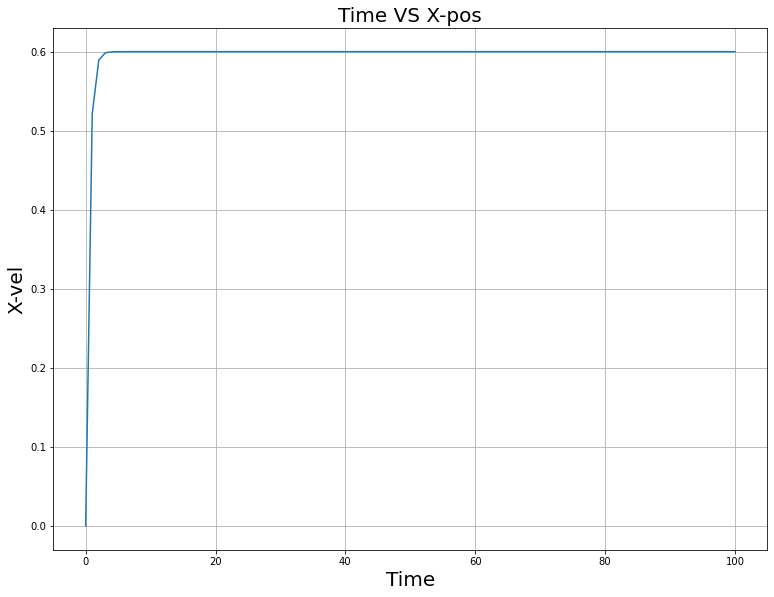

In [14]:
# Time VS y-pos
plt.figure(7,figsize=[12.8,9.6])
plt.title('Time VS X-pos', fontsize=20)
plt.plot(t,y[1])
plt.xlabel('Time',fontsize=20)
plt.ylabel('X-vel', fontsize=20)
plt.grid(True)

# Old Stuff

In [ ]:
# Simulation parameter
syspos = v1.PosControlSystem()
nT = 100;
T = np.linspace(0,100,nT)
x0 = np.array([0,0,0,0,0,0])  # initial condition
inp = np.ones(T.shape)
#U = [inp*2,inp,inp]


kp,kv,K = v1.GainMatK()

feed_nonlin_vehicle = ct.feedback(syspos,K,sign=-1)


# K matrix and R
R = np.array([inp,inp,inp])

K3=K[:,2]
K4=K[:,3]
K6=K[:,5]

K1=K[:,0]
K2=K[:,1]
K5=K[:,4]

Knew = np.array([K3,K4,K6])
Knew = np.transpose(Knew)

Kpos = np.array([K1,K2,K5])
Kpos = np.transpose(Kpos)


# Response
t, y = ct.input_output_response(feed_nonlin_vehicle, T, Kpos@R, x0)

# input response without controller
#t, y = ct.input_output_response(syspos, T,U,x0,solve_ivp_method='Radau')

# Plot
plt.figure(2)
plt.figure(2,figsize=[12.8,9.6])
plt.subplot(311)
plt.plot(t,y[0])
plt.subplot(312)
plt.plot(t,y[1])
plt.subplot(313)
plt.plot(t,y[2])

##### 

In [37]:
list(y[:,2])

[1.0131804078108213,
 0.05925062711527221,
 0.09087970896336861,
 0.41389404976374555,
 1.2341693144877295,
 2.6071794995703654]

In [9]:
from state import StateTrajectory
from state import State

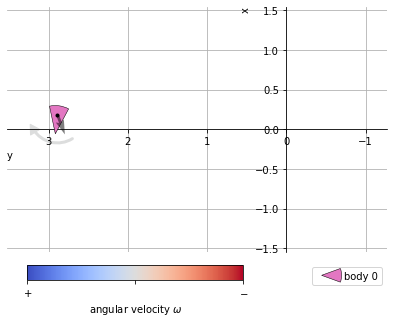

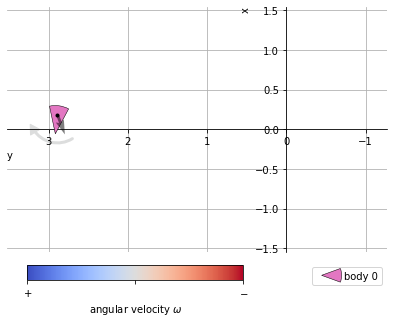

In [19]:
from state import StateTrajectory
from state import State

s = list(y[:,99])
x1 = State(x=[s],coord_sys='a')
x1.plot_state()


# Test

In [9]:
kp,kv,K = v1.GainMatK()

feed_nonlin_vehicle = ct.feedback(sys,K,sign=-1)

In [15]:
# Simulation param
#------------------
# Timespan
TT= np.linspace(0,100,100)
# Input array
inp = np.ones(TT.shape)

R = np.array([inp,inp,inp])


K3=K[:,2]
K4=K[:,3]
K6=K[:,5]

K1=K[:,0]
K2=K[:,1]
K5=K[:,4]

Knew = np.array([K3,K4,K6])
Knew = np.transpose(Knew)

Kpos = np.array([K1,K2,K5])
Kpos = np.transpose(Kpos)

Rnew = Knew@R
# Initial condition
x0 = np.array([0,0,0,0,0,0])



# Response
t, y = ct.input_output_response(feed_nonlin_vehicle, TT, Kpos@R, x0)

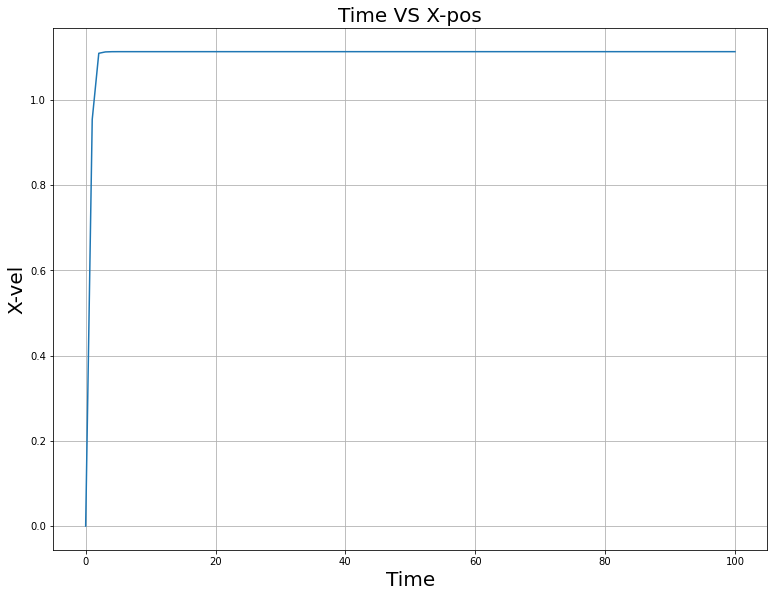

In [18]:
# Time VS X-pos
plt.figure(7,figsize=[12.8,9.6])
plt.title('Time VS X-pos', fontsize=20)
plt.plot(t,y[0])
plt.xlabel('Time',fontsize=20)
plt.ylabel('X-vel', fontsize=20)
plt.grid(True)

### CNN Model and Traj

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import TFNNModels as NNM
import NavigationTrajectory as nt
nt = nt.NavigationTrajectory()

C:\Users\ai598\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Created navigation trajectory object


In [5]:
model_conv1D_tar1 = tf.keras.models.load_model('Models\ Newmodel_conv1D_tar1')  # LOAD MODEL
model_conv1D_tar2 = tf.keras.models.load_model('Models\ Newmodel_conv1D_tar2')  # LOAD MODEL
model_conv1D_tar3 = tf.keras.models.load_model('Models\ Newmodel_conv1D_tar3')  # LOAD MODEL
model_conv1D_tar4 = tf.keras.models.load_model('Models\ Newmodel_conv1D_tar4')  # LOAD MODEL

In [6]:
# import data
df_good_inp = pd.read_csv('DataFiles/TestData_inp.csv')  # import data
df_good_target = pd.read_csv('DataFiles/TestData_tar.csv')  # import data
test_data_reshaped = np.asarray(df_good_inp)
test_data_reshaped = test_data_reshaped.reshape(5290,6,1)

In [7]:
test_predictions1=model_conv1D_tar1.predict(test_data_reshaped)
test_predictions2=model_conv1D_tar2.predict(test_data_reshaped)
test_predictions3=model_conv1D_tar3.predict(test_data_reshaped)
test_predictions4=model_conv1D_tar4.predict(test_data_reshaped)

166/166 [==============================] - 0s 2ms/step


In [8]:
def TargetAray(t1,t2,t3,t4):
    
    target = []
    for x in range(0,len(t1)):
        Array = np.array([t1[x],t2[x],t3[x],t4[x]])
        target.append(Array)
    return np.asarray(target).reshape(len(t1),4)        
    

In [9]:
goodinp = np.asarray(df_good_inp)
predtar = TargetAray(test_predictions1,test_predictions2,test_predictions3,test_predictions4)
indx = 4
Vmove = nt.Gen_MoveC2(goodinp,predtar,indx,parts=6)

In [53]:
Vmove

array([[0.06161868, 0.11205621, 0.16249373, 0.21293126, 0.26336878,
        0.31380631, 0.36424384, 0.36424384, 0.41078535, 0.45732687,
        0.50386839, 0.5504099 , 0.59695142, 0.64349294, 0.64349294,
        0.69496578, 0.74643862, 0.79791146, 0.84938431, 0.90085715,
        0.95232999],
       [0.96306908, 0.9342984 , 0.90552773, 0.87675705, 0.84798638,
        0.8192157 , 0.79044503, 0.79044503, 0.77490264, 0.75936025,
        0.74381787, 0.72827548, 0.71273309, 0.6971907 , 0.6971907 ,
        0.72332659, 0.74946248, 0.77559837, 0.80173426, 0.82787015,
        0.85400604]])

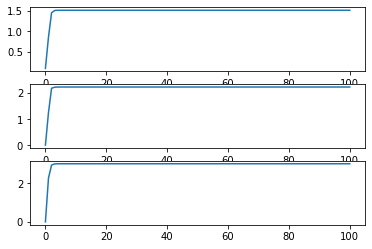

In [51]:
import matplotlib.pyplot as plt

ind = 10
# Simulation parameter
syspos = v1.PosControlSystem()
nT = 100;
T = np.linspace(0,100,nT)
x0 = np.array([.1,0,0,0,0,0])  # initial condition
inp = np.ones(T.shape)*3
U = [inp*Vmove[:,ind][0],inp*Vmove[:,ind][1],inp]
# input response without controller
t, y = ct.input_output_response(syspos, T,U,x0,solve_ivp_method='Radau')

# Plot
plt.figure(2)
plt.figure(2,figsize=[12.8,9.6])
plt.subplot(311)
plt.plot(t,y[0])
plt.subplot(312)
plt.plot(t,y[1])
plt.subplot(313)
plt.plot(t,y[2])

In [ ]:
y

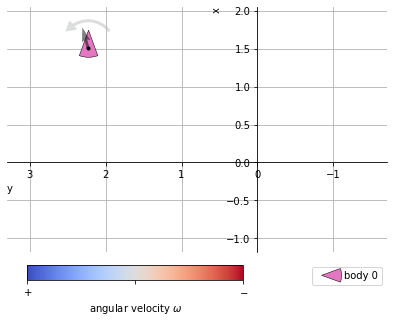

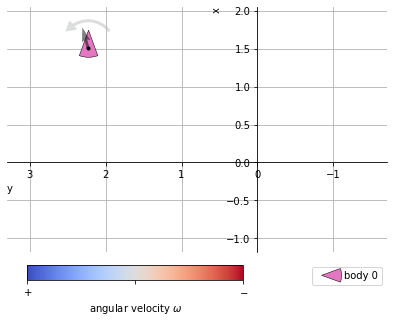

In [43]:
from state import StateTrajectory
from state import State

s = list(y[:,99])
x1 = State(x=[s],coord_sys='a')
x1.plot_state()